In [0]:
from fbprophet import Prophet

In [0]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [0]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight') # For plots

In [0]:
df= pd.read_csv('train.csv',
                   index_col=[0], parse_dates=[0]) # We set the index column and know it has dates


In [119]:
from datetime import datetime
df=df.iloc[1:26402, 0]
df.head()

timestamp
2017-04-01 00:15:00    2531.896894
2017-04-01 00:30:00    2171.649138
2017-04-01 00:45:00    2207.299159
2017-04-01 01:00:00    2839.441067
2017-04-01 01:15:00    2923.933348
Name: main_meter, dtype: float64

In [0]:
split_date = '2017-12-01 00:00:00'
df_train = df.loc[df.index <= split_date].copy()
df_test = df.loc[df.index > split_date].copy()

In [121]:
df_train.reset_index() \
    .rename(columns={'timestamp':'ds',
                     'main_meter':'y'}).head()

df_test.reset_index() \
    .rename(columns={'timestamp':'ds',
                     'main_meter':'y'}).head()

,ds,y
0,2017-12-01 00:15:00,2210.862367
1,2017-12-01 00:30:00,2124.672904
2,2017-12-01 00:45:00,2044.660803
3,2017-12-01 01:00:00,2177.456391
4,2017-12-01 01:15:00,2465.406123


In [122]:
# Setup and train model and fit
model = Prophet()
model.fit(df_train.reset_index() \
              .rename(columns={'timestamp':'ds',
                               'main_meter':'y'}))

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [0]:
df_test_fcst = model.predict(df=df_test.reset_index() \
                                   .rename(columns={'timestamp':'ds'}))

In [124]:
df_test_fcst.head(20)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-12-01 00:15:00,4963.725565,2559.751696,4874.199992,4963.725565,4963.725565,-1226.846674,-1226.846674,-1226.846674,-1279.368780,-1279.368780,-1279.368780,52.522105,52.522105,52.522105,0.0,0.0,0.0,3736.878891
1,2017-12-01 00:30:00,4964.081098,2517.488533,4819.295525,4964.081098,4964.081098,-1267.525817,-1267.525817,-1267.525817,-1318.276781,-1318.276781,-1318.276781,50.750964,50.750964,50.750964,0.0,0.0,0.0,3696.555281
2,2017-12-01 00:45:00,4964.436631,2517.067014,4776.376203,4964.436631,4964.436631,-1317.612035,-1317.612035,-1317.612035,-1366.742188,-1366.742188,-1366.742188,49.130153,49.130153,49.130153,0.0,0.0,0.0,3646.824595
3,2017-12-01 01:00:00,4964.792164,2404.911408,4644.151124,4964.792164,4964.792164,-1374.199498,-1374.199498,-1374.199498,-1421.861122,-1421.861122,-1421.861122,47.661625,47.661625,47.661625,0.0,0.0,0.0,3590.592666
4,2017-12-01 01:15:00,4965.147696,2421.827921,4776.625264,4965.147696,4965.147696,-1433.740240,-1433.740240,-1433.740240,-1480.087431,-1480.087431,-1480.087431,46.347191,46.347191,46.347191,0.0,0.0,0.0,3531.407456
5,2017-12-01 01:30:00,4965.503229,2413.458256,4556.787005,4965.503229,4965.503229,-1492.240074,-1492.240074,-1492.240074,-1537.428592,-1537.428592,-1537.428592,45.188518,45.188518,45.188518,0.0,0.0,0.0,3473.263155
6,2017-12-01 01:45:00,4965.858762,2261.851779,4554.815593,4965.858762,4965.858762,-1545.475378,-1545.475378,-1545.475378,-1589.662505,-1589.662505,-1589.662505,44.187128,44.187128,44.187128,0.0,0.0,0.0,3420.383384
7,2017-12-01 02:00:00,4966.214294,2187.167619,4518.839062,4966.214294,4966.214294,-1589.218437,-1589.218437,-1589.218437,-1632.562830,-1632.562830,-1632.562830,43.344393,43.344393,43.344393,0.0,0.0,0.0,3376.995858
8,2017-12-01 02:15:00,4966.569827,2273.331658,4445.471739,4966.569827,4966.569827,-1619.458807,-1619.458807,-1619.458807,-1662.120345,-1662.120345,-1662.120345,42.661538,42.661538,42.661538,0.0,0.0,0.0,3347.111020
9,2017-12-01 02:30:00,4966.925360,2111.730979,4485.577345,4966.925360,4966.925360,-1632.608734,-1632.608734,-1632.608734,-1674.748368,-1674.748368,-1674.748368,42.139634,42.139634,42.139634,0.0,0.0,0.0,3334.316626


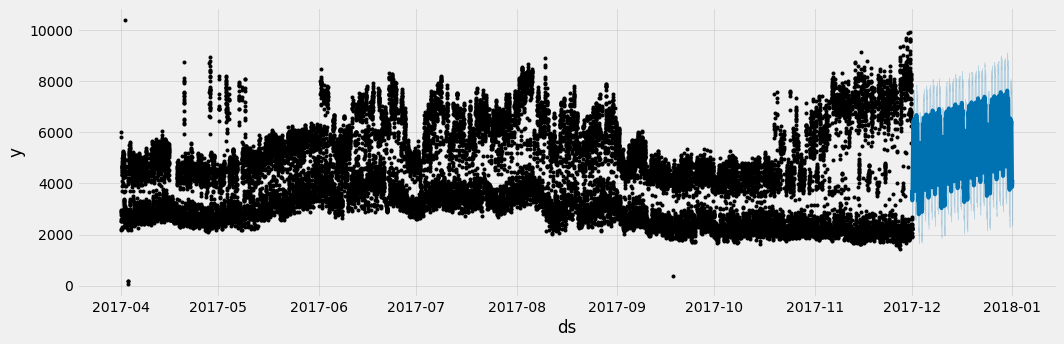

In [125]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(df_test_fcst,
                 ax=ax)
plt.show()

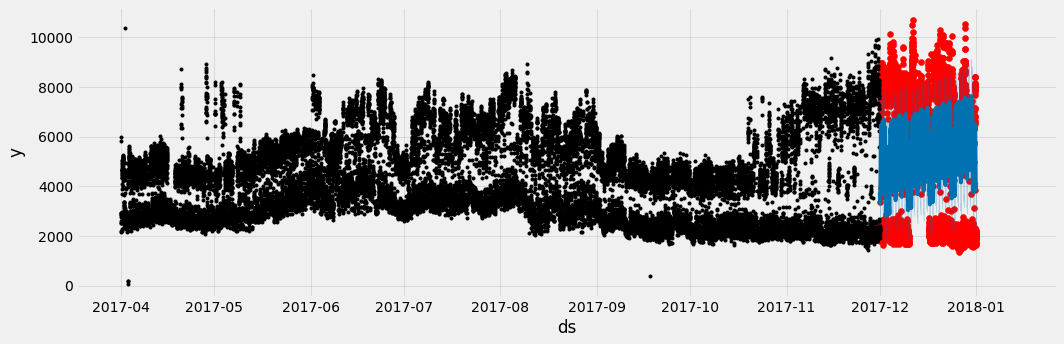

In [126]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(df_test.index, df_test[:], color='r')
fig = model.plot(df_test_fcst, ax=ax)